In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv(".dataset.csv")

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:

data.head()  #print first five rows by default

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Get the number of rows and columns
num_observations, num_features = data.shape

# Print the results
print(f"Number of observations (rows): {num_observations}")
print(f"Number of features (columns): {num_features}")

Number of observations (rows): 918
Number of features (columns): 12


In [6]:
data.dtypes  #define the type of data.

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

The categorical columns will be dtype object for this dataset. We need to note that a couple of columns -- FastingBS and HeartDisease -- have the dtype int64, but are also categorical variables, since they only take the values 0 and 1.

In [7]:
data.describe()       #Display the descriptive statistics for the DataFrame

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


RestingBP should not be 0 its minimum is 0 and max is 200

Average age is 53

RestingBP and Cholesterol have a minimum value of zero.

In [8]:
data.isna().sum() #shows if there are any missing values in the data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There don't seem to be any missing values in these columns.

In [9]:
data.nunique(axis=0)  #returns the number of unique values for each variable

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [10]:
#List of categorical columns
categorical_columns = ['Age','HeartDisease', 'FastingBS', 'Sex', 'ChestPainType', 'RestingECG','Oldpeak', 'RestingBp']

In [11]:
# Loop through each categorical column
for column in categorical_columns:
    # Get the count of each category in the column
    category_counts = data[column].value_counts()

KeyError: 'RestingBp'

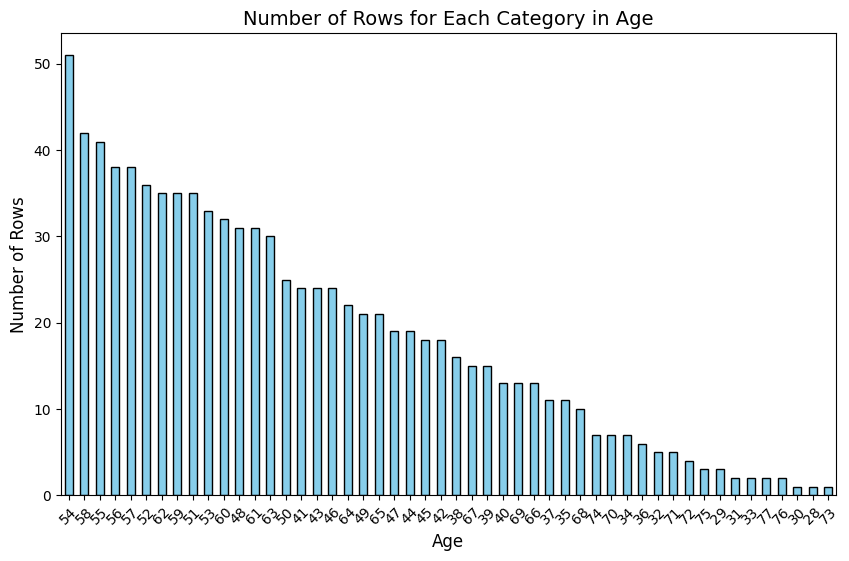

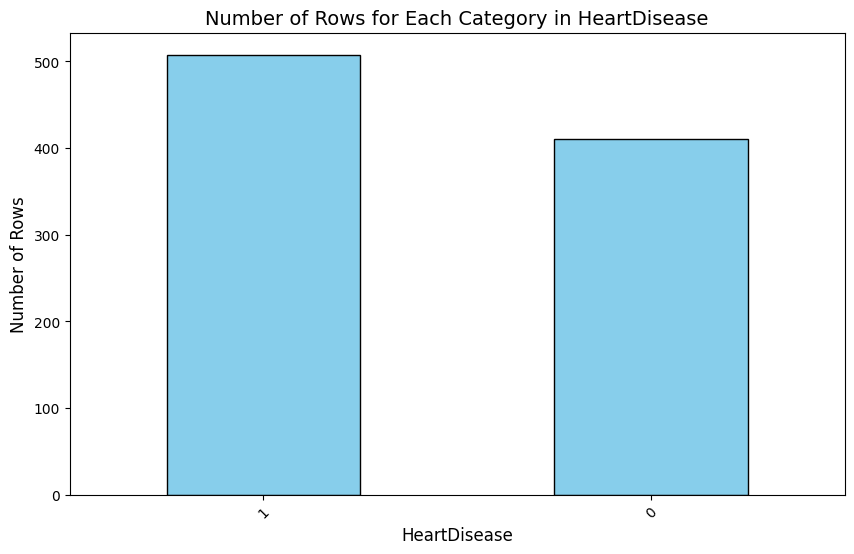

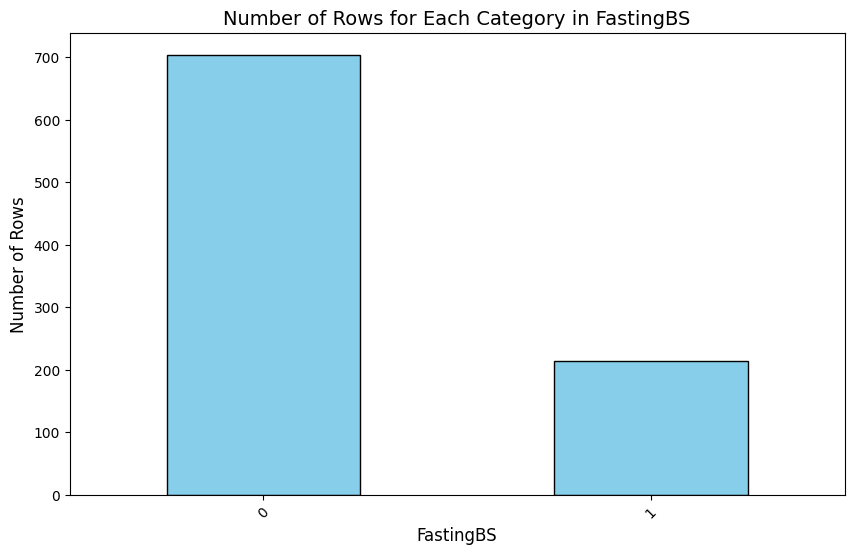

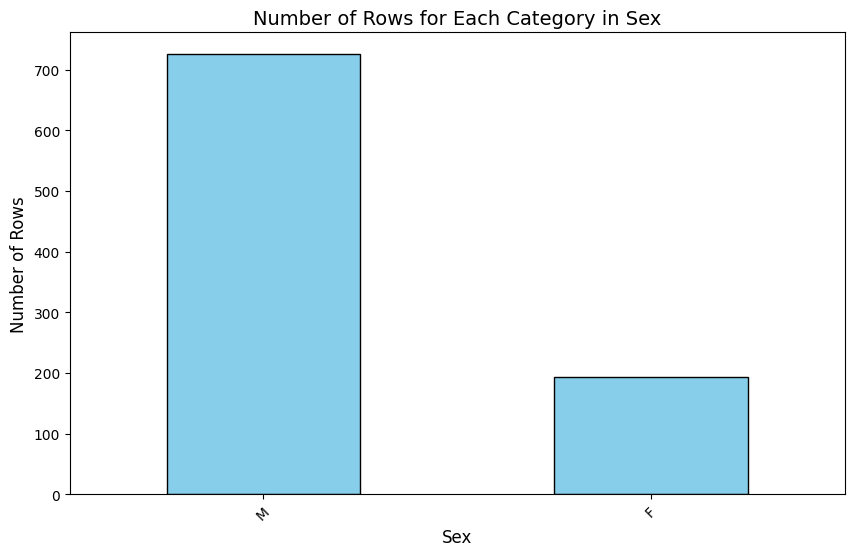

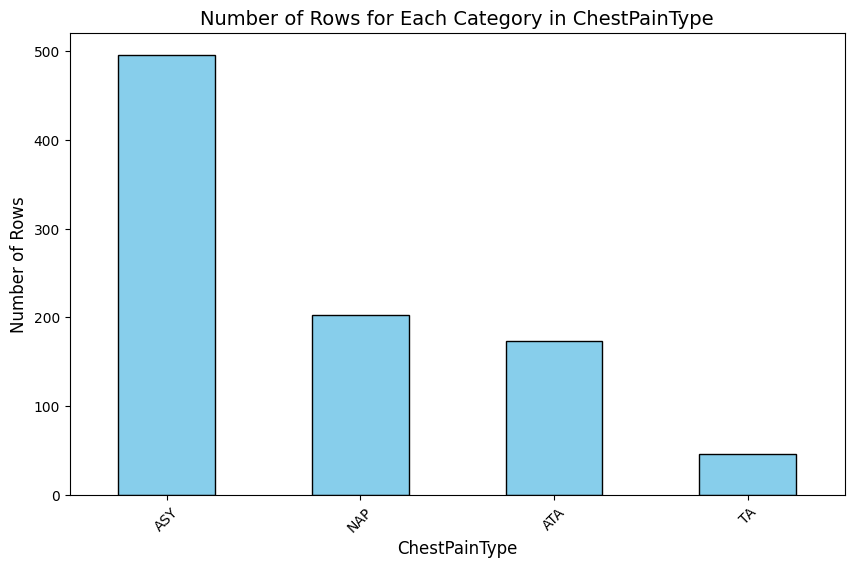

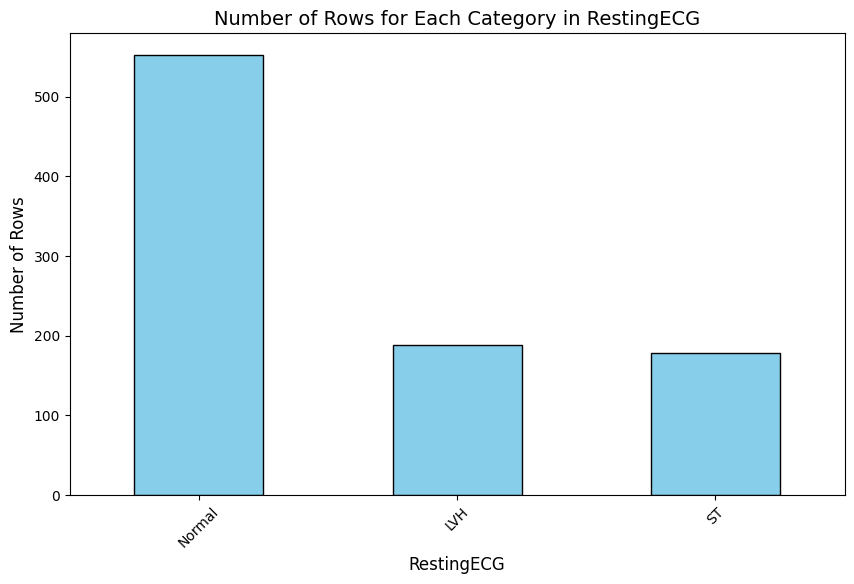

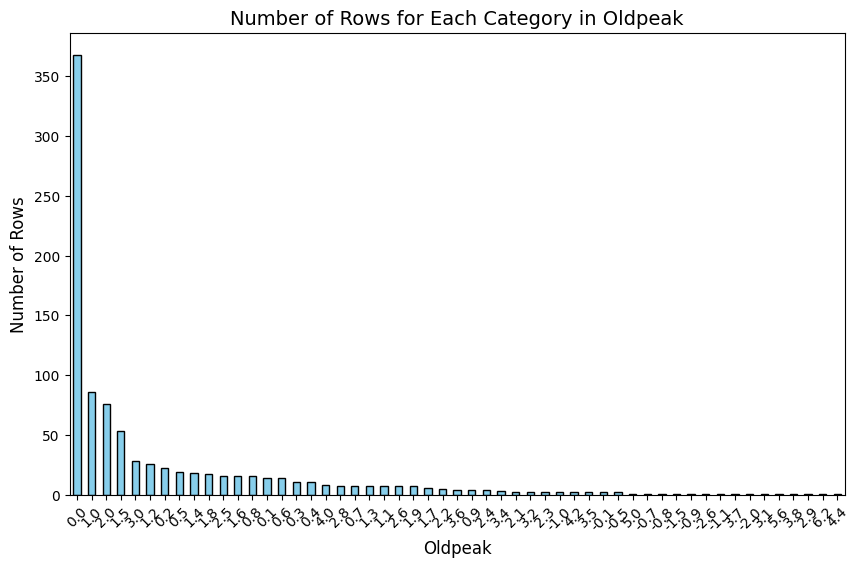

In [ ]:

# Loop through each categorical column and plot its bar chart
for column in categorical_columns:
    # Get the count of each category in the column
    category_counts = data[column].value_counts()
    
    # Create a new figure for each column's bar chart
    plt.figure(figsize=(10, 6))
    
    # Plot the bar chart for the current column
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Add title and labels
    plt.title(f'Number of Rows for Each Category in {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Number of Rows', fontsize=12)
    
    # Display the bar chart
    plt.xticks(rotation=45)
    
    # Show each plot one by one
    plt.show()


<Figure size 1000x800 with 0 Axes>

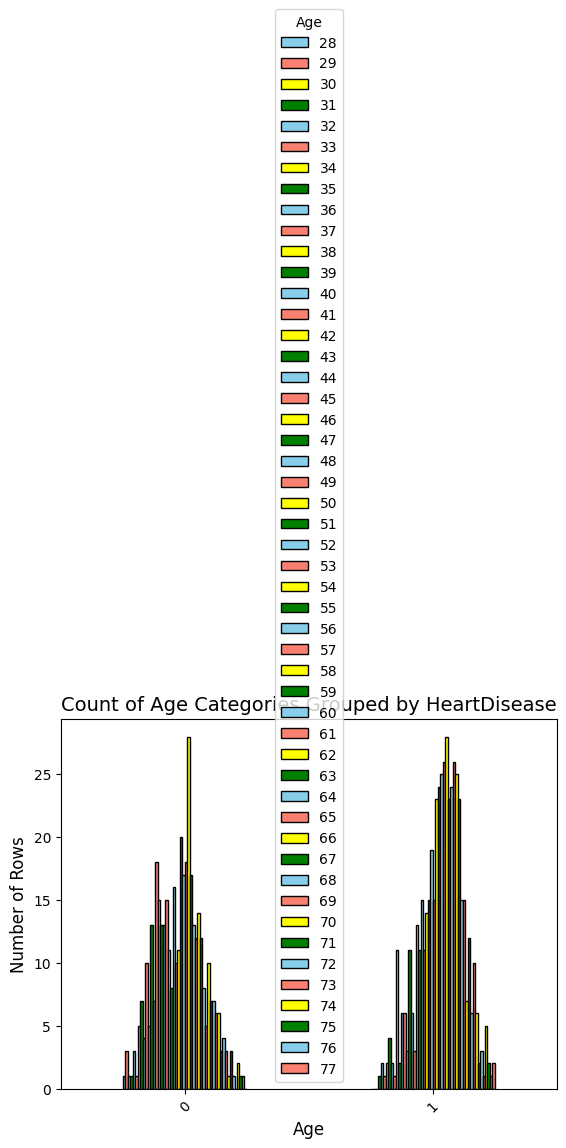

<Figure size 1000x800 with 0 Axes>

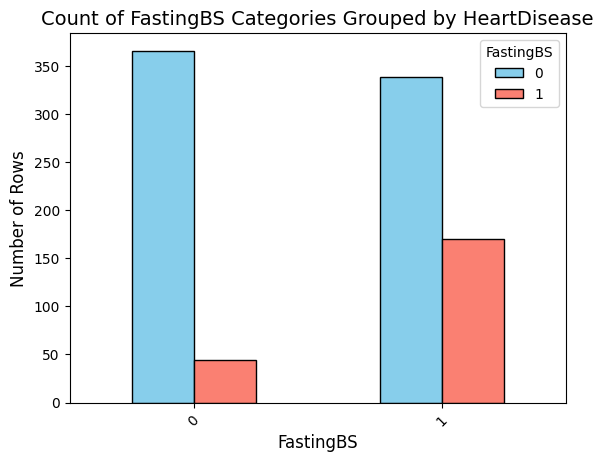

<Figure size 1000x800 with 0 Axes>

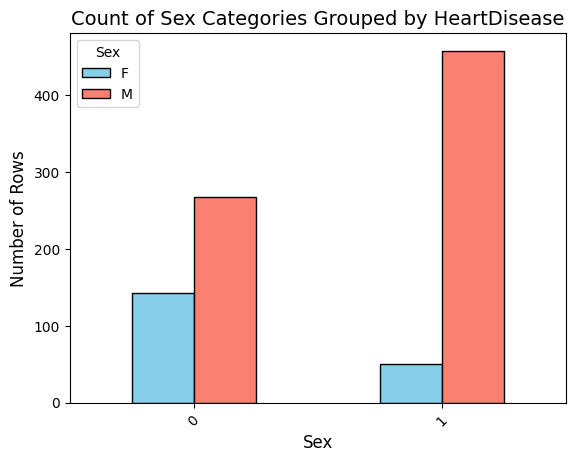

<Figure size 1000x800 with 0 Axes>

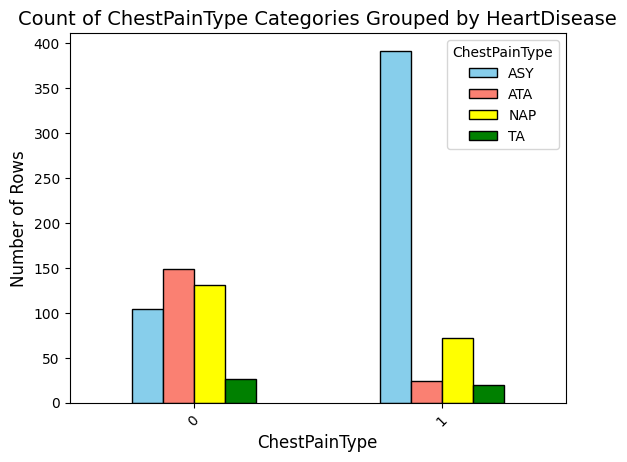

<Figure size 1000x800 with 0 Axes>

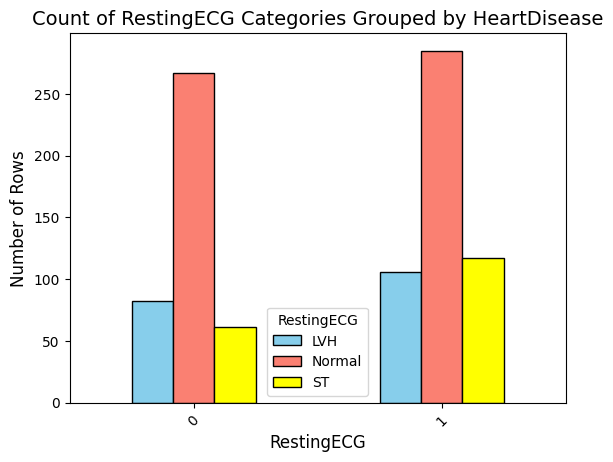

<Figure size 1000x800 with 0 Axes>

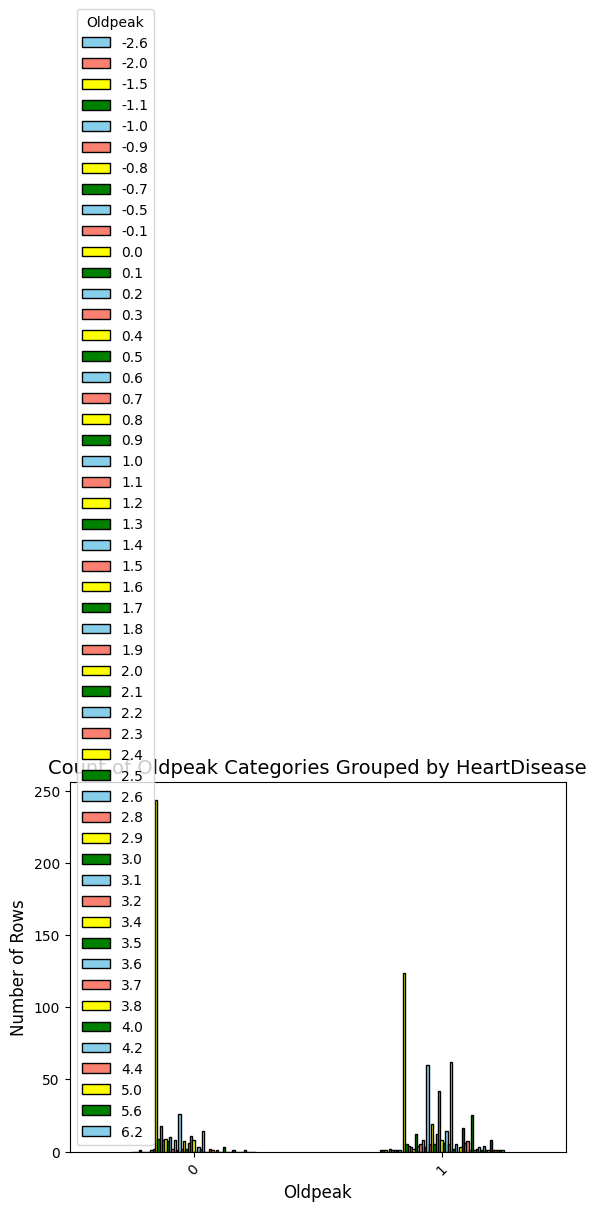

In [ ]:
categorical_columns = list(categorical_columns)  # Convert to list to append

# Loop through each categorical column and plot its bar chart grouped by 'HeartDisease'
for column in categorical_columns:
    if column != 'HeartDisease':  # Skip 'HeartDisease' itself
        # Group by 'HeartDisease' and count the categories in the current column
        
        # Use .value_counts() instead of .size() for better handling of missing data
        grouped = data.groupby(['HeartDisease', column]).size().unstack(fill_value=0)
        
        # Create a new figure for each column's bar chart
        plt.figure(figsize=(10, 8))
        
        # Plot the bar chart for the current column grouped by 'HeartDisease'
        grouped.plot(kind='bar', stacked=False, color=['skyblue', 'salmon', 'yellow', 'green'], edgecolor='black')
        
        # Add title and labels
        plt.title(f'Count of {column} Categories Grouped by HeartDisease', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Number of Rows', fontsize=12)
        
        # Display the bar chart
        plt.xticks(rotation=45)
        
        # Show each plot one by one
        plt.show()

In [ ]:
# Filter the DataFrame for patients diagnosed with heart disease (HeartDisease == 1)
data[data['HeartDisease'] == 1]['Age'].median()
#median_age_heart_disease = heart_disease_patients['Age'].median()

np.float64(57.0)

In [12]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [13]:
data[data['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Above data has 0 as a value of cholesterol, dropping this amount of data is not feasible so we are going to replace it by the median of the cholesterol data.

In [ ]:
median_cholesterol=data['Cholesterol'].median() # found median

In [15]:
data['Cholesterol'] = data['Cholesterol'].replace(0, median_cholesterol)

In [16]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [17]:
data[data['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Now no rows of cholesterol has 0 as its value

In [18]:
data[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,223,0,Normal,155,N,1.5,Flat,1


Only one row of restingBP has 0 as its value so we simply drop it.

In [19]:
data.drop(449, inplace=True)  #dropped the row which has 0 as a value of restingBP

In [20]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


We got our almost cleaned data.

In [21]:
columns = ["Sex","ChestPainType","RestingECG", "ExerciseAngina", "ST_Slope"]

for col in columns:
    data[col], unique_values = pd.factorize(data[col])   #The pd.factorize function encodes array-like data) into unique integers
    print(f"Column '{col}': {dict(enumerate(unique_values))}")  #to see the values encoded
    #data[col] Updates the column (data[col]) with the factorized values

Column 'Sex': {0: 'M', 1: 'F'}
Column 'ChestPainType': {0: 'ATA', 1: 'NAP', 2: 'ASY', 3: 'TA'}
Column 'RestingECG': {0: 'Normal', 1: 'ST', 2: 'LVH'}
Column 'ExerciseAngina': {0: 'N', 1: 'Y'}
Column 'ST_Slope': {0: 'Up', 1: 'Flat', 2: 'Down'}


Above we converted all String values to integers.

In [22]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [23]:
data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055670,0.214291,0.263084,0.031037,0.198170,0.213349,-0.382280,0.216017,0.258563,0.268217,0.282012
Sex,-0.055670,1.000000,-0.180118,-0.009427,0.127268,-0.120424,0.017930,0.189668,-0.191226,-0.105444,-0.150408,-0.305118
ChestPainType,0.214291,-0.180118,1.000000,0.073274,0.005376,0.154842,0.111684,-0.272780,0.323742,0.301280,0.352831,0.459810
RestingBP,0.263084,-0.009427,0.073274,1.000000,0.090791,0.067823,0.094520,-0.109693,0.153064,0.174252,0.082155,0.117990
Cholesterol,0.031037,0.127268,0.005376,0.090791,1.000000,-0.008243,0.077104,0.026997,0.063432,0.056948,0.043021,0.043329
FastingBS,0.198170,-0.120424,0.154842,0.067823,-0.008243,1.000000,0.050280,-0.131067,0.059988,0.053062,0.176196,0.267994
RestingECG,0.213349,0.017930,0.111684,0.094520,0.077104,0.050280,1.000000,0.049165,0.035470,0.114953,0.079333,0.061791
MaxHR,-0.382280,0.189668,-0.272780,-0.109693,0.026997,-0.131067,0.049165,1.000000,-0.370023,-0.161213,-0.344047,-0.401410
ExerciseAngina,0.216017,-0.191226,0.323742,0.153064,0.063432,0.059988,0.035470,-0.370023,1.000000,0.409494,0.429483,0.495490
Oldpeak,0.258563,-0.105444,0.301280,0.174252,0.056948,0.053062,0.114953,-0.161213,0.409494,1.000000,0.501735,0.403638


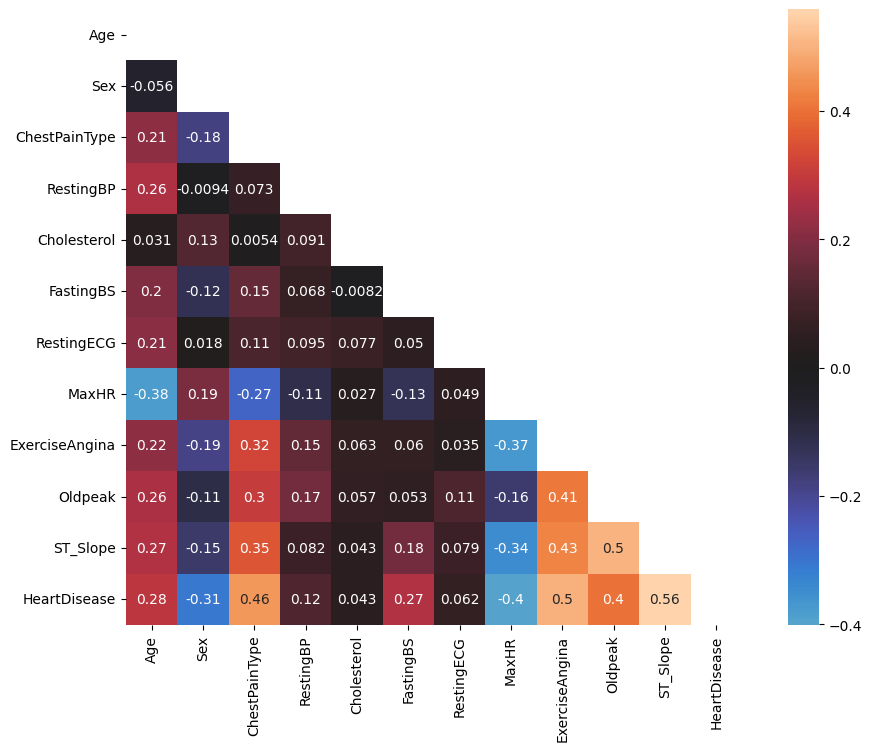

In [24]:
data_corr = data.corr()
plt.figure(figsize=(12, 8))
upper_traingle_mask = np.triu(np.ones_like(data_corr,dtype=bool))
sns.heatmap(data=data_corr,center=0,annot=True,square=True,xticklabels=True,yticklabels=True,mask=upper_traingle_mask)
plt.show()

In [25]:
selected_features = list(data_corr[data_corr[data.columns[-1]] > 0.2].index)

In [26]:
refined_data = data[selected_features]

In [27]:
refined_data

,Age,ChestPainType,FastingBS,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,0,0.0,0,0
1,49,1,0,0,1.0,1,1
2,37,0,0,0,0.0,0,0
3,48,2,0,1,1.5,1,1
4,54,1,0,0,0.0,0,0
...,...,...,...,...,...,...,...
913,45,3,0,0,1.2,1,1
914,68,2,1,0,3.4,1,1
915,57,2,0,1,1.2,1,1
916,57,0,0,0,0.0,1,1


In [28]:

x= refined_data.drop('HeartDisease',axis =1)  #HeartDisease is the data(column name) you are predicting'
y = refined_data['HeartDisease']

It is a common way to split a dataset into features (x) and a target variable (y).

In [29]:
#Split the dataset into training and validation sets

x_train, x_test, y_train, y_test = train_test_split(x ,y,test_size = 0.2 , random_state= 0 )

With test_size=0.2:

20% of the rows are randomly selected for the test set.
80% of the rows are used for the training set.

With random_state=0:

The same rows will consistently be selected for the test set every time you run the code.

In [30]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    #This represents an instance of a scaler object
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

KNN is sensetive to feature magnitudes.

Fit: It calculates the necessary parameters (mean and standard deviation for StandardScaler) from the training data (x_train).

Transform: It then applies these calculated parameters to scale the data, so that each feature has-
A mean of 0 and
A standard deviation of 1


In [31]:
x_train

array([[ 1.749712  ,  0.63946819,  1.87741614,  1.2081935 ,  1.04539188,
         0.60074694],
       [-0.80154647,  0.63946819, -0.53264696,  1.2081935 ,  0.57062593,
         0.60074694],
       [ 1.21819982, -0.51789029, -0.53264696, -0.82768199, -0.09404641,
        -1.05469482],
       ...,
       [ 1.85601443,  0.63946819, -0.53264696, -0.82768199,  0.66557912,
         0.60074694],
       [ 0.04887302, -0.51789029, -0.53264696, -0.82768199, -0.66376555,
        -1.05469482],
       [ 0.79299007,  0.63946819, -0.53264696,  1.2081935 ,  2.56464294,
         0.60074694]], shape=(733, 6))

In [32]:
x_test

array([[ 0.15517545,  0.63946819,  1.87741614, -0.82768199, -0.75871874,
         0.60074694],
       [ 1.32450225,  0.63946819, -0.53264696, -0.82768199, -0.47385917,
         0.60074694],
       [-0.27003429,  0.63946819,  1.87741614, -0.82768199, -0.85367194,
         0.60074694],
       ...,
       [ 2.17492174, -0.51789029,  1.87741614, -0.82768199, -0.85367194,
         0.60074694],
       [-1.7582684 , -1.67524877, -0.53264696, -0.82768199, -0.85367194,
        -1.05469482],
       [-0.05742942, -0.51789029,  1.87741614,  1.2081935 , -0.85367194,
         0.60074694]], shape=(184, 6))

As we can see all the data is near 0 with standard deviaton 1.

FORMULA USED IN ABOVE FOR TRANSFORMATION
z= x−μ/σ , z = standardized value, x = original value, σ = standard deviation, μ = mean of feature

In [33]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # Created KNN classifier 
knn.fit(x_train, y_train)

KNeighborsClassifier()

"n_neighbours = 5" means the number of neighbours which is just a value of k.


"metric = minkowski" specify the distance matric used for calculating distance between data points.

Euclidean distance (p = 2)

Manhattan distance (p= 1)

In [34]:
y_pred = knn.predict(x_test)  #predict the test set result

In [35]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1])

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [37]:
accuracy

0.8532608695652174

In [38]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [48]:
cm

array([[65, 17],
       [10, 92]])